<a href="https://colab.research.google.com/github/wingated/cs180_labs/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import spacy

In [ ]:
# this will take a moment, run as soon as you can
!python -m spacy download en_core_web_lg

# RESTART YOUR RUNTIME. COLAB BUG. WON'T LOAD SPACY PACKAGE OTHERWISE

When trying to find the k-nearest neighbors you have to have a few foundational pieces first. 

Primary among this is a measure of "nearest". The purpose of the KNN algorithm is to classify a new, previously unseen, point given a set of training data. That classification process is a search for the point in the training data that is closest to the query (test) point. 

## Distances

There are a number of ways to define distance between vectors

L1: |v1 - v2|

L2: sqrt(sum((v1 - v2)**2)) often called euclidean norm

L$\infty$: max(|v1 - v2|)

cosine: 

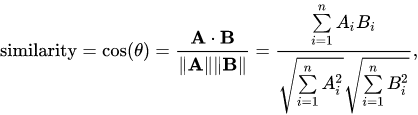

arccos(similarity) gives the angle between two vectors

Note: While we are using vector notation here, you actually have an elementwise subtraction and all other operations are also elementwise. Luckily, numpy supports this natively. 


Feel free to look on wikipedia for a full definition of these distances

## Question 1

Fill in the three remaining distance metrics for 1 dimensional input vectors v1 and v2

In [ ]:
def L1_norm(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.sum(np.abs(v1 - v2))

def L2_norm(v1, v2):
    pass

def Linfinity_norm(v1, v2):
    pass

def cosine_similarity(v1, v2):
    pass

In [ ]:
#sanity check
a = np.random.random(10)
b = np.ones(10)
print(L1_norm(a, b) == np.linalg.norm(a - b, ord=1))
print(L2_norm(a, b) == np.linalg.norm(a - b)) # L2 norm is default
print(Linfinity_norm(a, b) == np.linalg.norm(a - b, ord=np.inf))
print(cosine_similarity(a, b) == np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))) # you're welcome

## Question 2

Code up a function that takes a query vector, training_data matrix, distance function, and parameter k. 

This function will compute the k nearest neighbors from the training_data matrix to the test_query vector according to your distance_function. 

You will want to return the distance values and the vectors (or a descriptive label) for each neighbor found.

You can use a heap to efficiently keep track of minimum distances if you'd like. But it's up to you. 

In [ ]:
import heapq # you can use this to keep track of distances if you want. It's good data structure practice
def knn(test_query, training_data, distance_function, k=3):
    pass

In [ ]:
knn(np.array([1,0,0]), np.eye(3), L1_norm, k = 1) # should return an identical element with a distance 0

## Question 3

In [ ]:
!wget https://dasl.datadescription.com/download/data/3043
!mv 3043 adoptions.txt

In [ ]:
import pandas as pd
df = pd.read_csv('adoptions.txt', sep="\t") # this is an example of a tab separated dataset
df.head()

In [ ]:
df.iloc[0].array

Find the top 4 neighbor states to Utah state using the three numeric columns and your choice of distance function.

## Note: You will need to modify your KNN function to handle a data frame

you can copy and paste a new definition here

In [ ]:
# find 4 nearest neighbors to utah

Explore the differences in results between various distance functions, show us something interesting and write about why you think this is the case. 

your written answer here

# Question 4

In [ ]:
nlp = spacy.load('en_core_web_lg') # restart your runtime, if you haven't already, this load also takes some time

In [ ]:
v1 = nlp("this is a sentence about bananas").vector
v2 = nlp("on the other hand, here we talk about oranges").vector
v3 = nlp("totally unrelated paris sentence").vector

In [ ]:
print(v1.shape, v2.shape, v3.shape)

In [ ]:
print(L1_norm(v1, v2))
print(L1_norm(v2, v3))
print(L1_norm(v1, v3))

Spacy is a great package for easy natural language. It allows you to turn arbitrary sentences into vectors of size 300. You can then use "distance" operations to measure the similarity of two sentences.

Notice that the bananas and oranges sentence are far more similar than the random sentence about paris. Neat!

## We are going to be building a clickbait classification detector. 

Let's first prepare the dataset by downloading, reading, and formatting. 

In [ ]:
!wget https://github.com/bhargaviparanjape/clickbait/raw/master/dataset/clickbait_data.gz
!wget https://github.com/bhargaviparanjape/clickbait/raw/master/dataset/non_clickbait_data.gz

In [ ]:
!gunzip clickbait_data.gz
!gunzip non_clickbait_data.gz

In [ ]:
with open("clickbait_data", "r") as f:
    cb = # read in the data and split on double new lines

with open("non_clickbait_data", "r") as f:
    ncb = # read in the data and split on double new lines

In [ ]:
cb = np.array(cb)
ncb = np.array(ncb)

## Add a column of ones to the clickbait and zeros to the non click bait then merge the two lists. You can make a dataframe, iterate, use list comprehensions, or use vstack/hstack (transpose). 

Your new dataset should be [len(cb)+len(ncb), 2]

In [ ]:
df = pd.DataFrame(np.vstack((np.vstack((cb, np.ones_like(cb))).T,
                             np.vstack((ncb, np.ones_like(ncb))).T)), columns=["text", "label"])

## Question 5

Test your knn function on this clickbait dataset. Try and write the best clickbait title you can. 

Demonstrate that your method is working with a few example test_queries. 

## Note: You will need to use `.vector` on the text columns to get a vector you can pass into your knn function.

## EXTRA CREDIT + 10%

split the dataset into a train set and a test set. Show the accuracy of the different distance functions. 